<a href="https://colab.research.google.com/github/bhisneumesh/SVM/blob/main/svm_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [5]:
#
Original_data = pd.read_csv("adult.csv", 
                            names = ["age", "workspace", "fnlwgt", "Education", "education_num", "maritial_status", "occupation", "relationship", "race", "gender", "capital_gain", "capital_loss", "hours_per_week", "country", "target"],
                            sep = r'\s*,\s*',
                            engine = 'python',
                            na_values = "?"
                            )

In [6]:
Original_data.head()

,age,workspace,fnlwgt,Education,education_num,maritial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,target
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


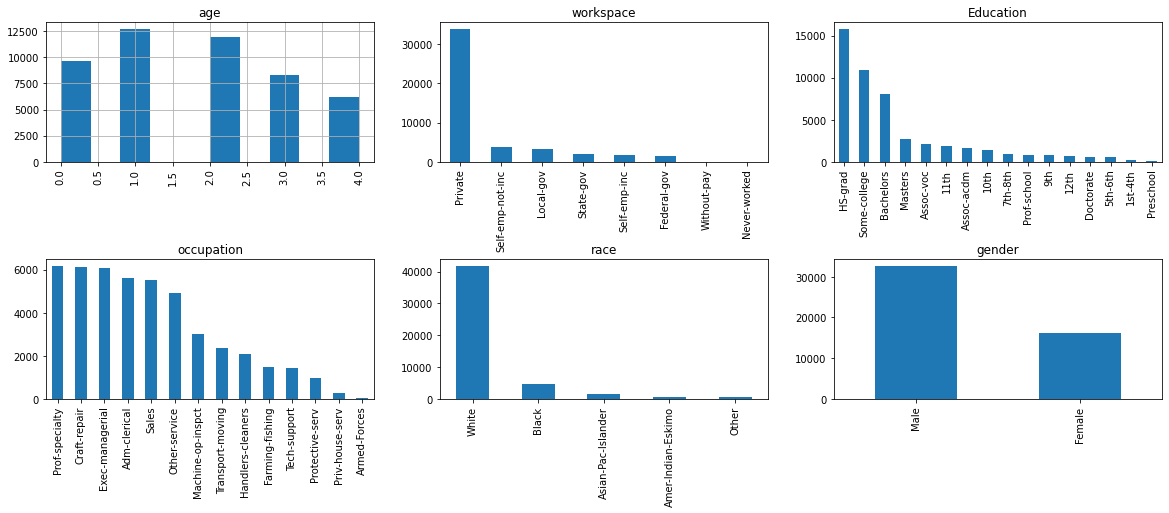

In [7]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig = plt.figure(figsize = (20,20))
cols = 3
rows = math.ceil(float(Original_data.shape[1])/cols)

for i, column in enumerate(['age', 'workspace', 'Education', 'occupation', 'race', 'gender']):
  ax = fig.add_subplot(rows, cols, i + 1)
  ax.set_title(column)
  if Original_data.dtypes[column] == np.object:
    Original_data[column].value_counts().plot(kind = 'bar', axes = ax)
  else:
    Original_data[column].hist(axes = ax)
    plt.xticks(rotation = "vertical")
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)
plt.show()  

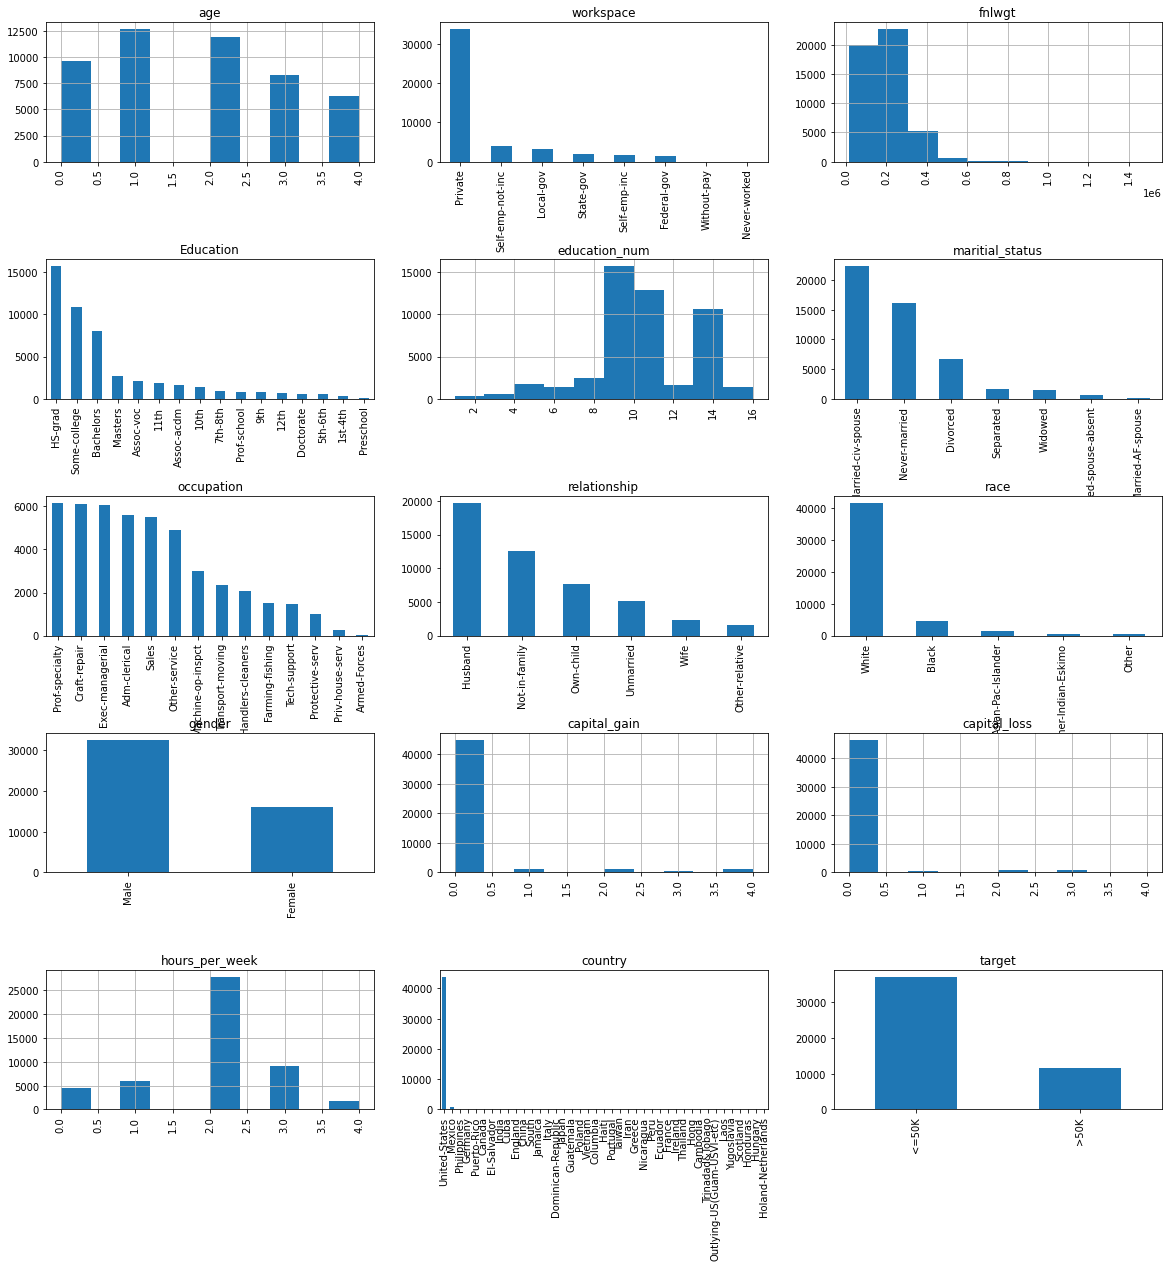

In [8]:
fig = plt.figure(figsize = (20,20))
cols = 3
rows = math.ceil(float(Original_data.shape[1])/cols)

for i, column in enumerate(["age", "workspace", "fnlwgt", "Education", "education_num", "maritial_status", "occupation", "relationship", "race", "gender", "capital_gain", "capital_loss", "hours_per_week", "country", "target"]):
  ax = fig.add_subplot(rows, cols, i + 1)
  ax.set_title(column)
  if Original_data.dtypes[column] == np.object:
    Original_data[column].value_counts().plot(kind = 'bar', axes = ax)
  else:
    Original_data[column].hist(axes = ax)
    plt.xticks(rotation = "vertical")
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)
plt.show()

In [9]:
#uselabel encoder to transform our text to numbers
import sklearn.preprocessing as preprocessing

le = preprocessing.LabelEncoder()
Original_data['occupation'] = le.fit_transform(Original_data['occupation'].astype(str))
Original_data.head()


,age,workspace,fnlwgt,Education,education_num,maritial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,target
0,2,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,2,Cuba,<=50K


In [10]:
Original_data['target'] = le.fit_transform(Original_data['target'].astype(str))
Original_data.tail()

,age,workspace,fnlwgt,Education,education_num,maritial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,target
48837,2,Private,215419,Bachelors,13,Divorced,9,Not-in-family,White,Female,0,0,2,United-States,0
48838,4,NaN,321403,HS-grad,9,Widowed,14,Other-relative,Black,Male,0,0,2,United-States,0
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,9,Husband,White,Male,0,0,3,United-States,0
48840,2,Private,83891,Bachelors,13,Divorced,0,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,0
48841,1,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,3,United-States,1


In [11]:
Original_data.target.unique()


array([0, 1])

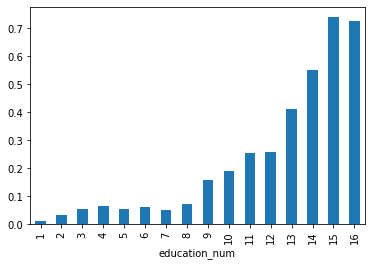

In [12]:
Original_data.groupby('education_num').target.mean().plot(kind = 'bar')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
# Taking only the important variables as of now for training
x = Original_data[['education_num','occupation']]
y = Original_data['target']

#splitting our data into 80% training set and 20% testing set so that we can see accuracy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.svm import SVC
#declaring the model without any tuning
classifier = SVC()

#Fitting the data. this is where the SVM will learn from data.
classifier.fit(x_train,y_train)

#predicting the results and accuracy of model
score = classifier.score(x_test, y_test)
print(score)

0.7875934077182926


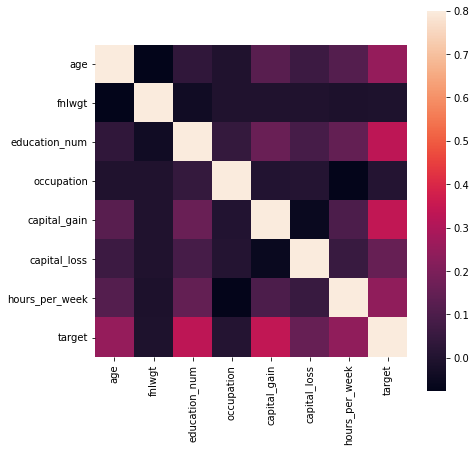

In [15]:
#to increse the accuracy further we will build the correlation matrix using seaborn package
import seaborn as sns
corr_mat = Original_data.corr()
f, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(corr_mat, vmax = .8, square = True);
plt.show()

In [16]:
Original_data['race'] = le.fit_transform(Original_data['race'].astype(str))
Original_data['gender'] = le.fit_transform(Original_data['gender'].astype(str))
Original_data['maritial_status'] = le.fit_transform(Original_data['maritial_status'].astype(str))
Original_data['Education'] = le.fit_transform(Original_data['Education'].astype(str))

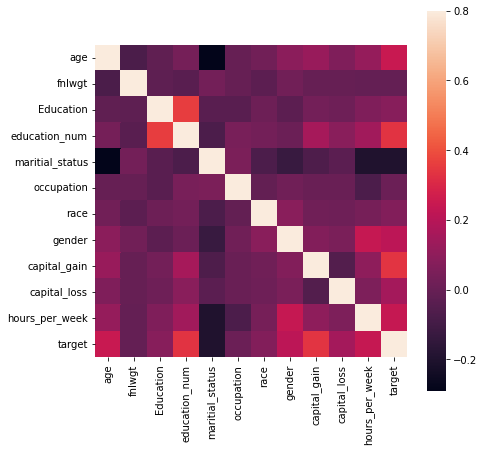

In [17]:
corr_mat = Original_data.corr()
f, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(corr_mat, vmax = .8, square = True);
plt.show()

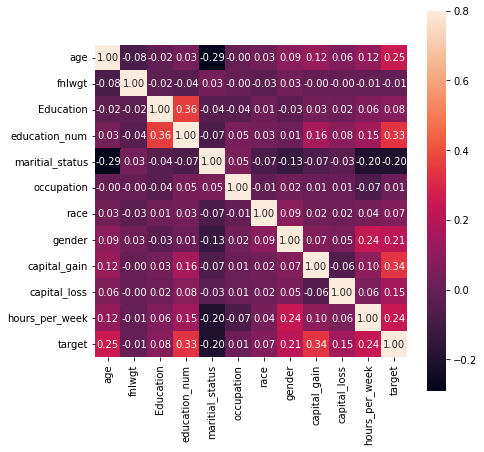

In [18]:
corr_mat = Original_data.corr()
f, ax = plt.subplots(figsize = (7, 7))
sns.heatmap(corr_mat, vmax = .8, square = True, annot=True, fmt = '.2f');
plt.show()

In [19]:
#from the above map age seems to be important lets reset the variables
x = Original_data[['education_num','occupation','age']]
y = Original_data['target']

#splitting our data into 80% training set and 20% testing set so that we can see accuracy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.svm import SVC
#declaring the model without any tuning
classifier = SVC()

#Fitting the data. this is where the SVM will learn from data.
classifier.fit(x_train,y_train)

#predicting the results and accuracy of model
score = classifier.score(x_test, y_test)
print(score)

0.7936329204626881


In [20]:
#from the above map age seems to be important lets reset the variables
x = Original_data[['education_num','occupation','age','gender']]
y = Original_data['target']

#splitting our data into 80% training set and 20% testing set so that we can see accuracy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.svm import SVC
#declaring the model without any tuning
classifier = SVC()

#Fitting the data. this is where the SVM will learn from data.
classifier.fit(x_train,y_train)

#predicting the results and accuracy of model
score = classifier.score(x_test, y_test)
print(score)

0.8048930289691882


In [21]:
#from the above map age seems to be important lets reset the variables
x = Original_data[['education_num','occupation','age','gender','capital_loss','capital_gain','hours_per_week']]
y = Original_data['target']

#splitting our data into 80% training set and 20% testing set so that we can see accuracy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.svm import SVC
#declaring the model without any tuning
classifier = SVC()

#Fitting the data. this is where the SVM will learn from data.
classifier.fit(x_train,y_train)

#predicting the results and accuracy of model
score = classifier.score(x_test, y_test)
print(score)

0.8248541304125294


In [22]:
#setting our kernal to radial basis function with penality parameter as 1.0
classifier = SVC(kernel='rbf', C = 1.0)

classifier.fit(x_train,y_train)

#predicting the results and accuracy of model
score = classifier.score(x_test, y_test)
print(score)
#rbf kernel with C as 1.0 is default SVM classifier

0.8248541304125294


In [23]:
#setting our kernal to radial basis function with penality parameter as 1.0
classifier = SVC(kernel='rbf', C = 10.0)

classifier.fit(x_train,y_train)

#predicting the results and accuracy of model
score = classifier.score(x_test, y_test)
print(score)

0.8309960077797113


In [24]:
classifier = SVC(kernel='rbf', C = 19.0)

classifier.fit(x_train,y_train)

#predicting the results and accuracy of model
score = classifier.score(x_test, y_test)
print(score)

0.8328385709898659


In [25]:
#hyper parameter tuning it is called
classifier = SVC(kernel='rbf', C = 25.0)

classifier.fit(x_train,y_train)

#predicting the results and accuracy of model
score = classifier.score(x_test, y_test)
print(score)

0.8337598525949432


In [26]:
#using linear kernel
classifier = SVC(kernel='linear', C = 1.0)

classifier.fit(x_train,y_train)

#predicting the results and accuracy of model
score = classifier.score(x_test, y_test)
print(score)

0.8170744190807657
